In [1]:
"""
1. 데이터 검증
2. 데이터 시각화
3. 데이터 normalization
4. feature 분석
5. 모델 설계
6. 학습
7. 성능 평가
"""

import pandas as pd
import numpy as np

# pd.set_option('display.max_rows', None)
kbo_path = './kbo_1bu_infielder_2017-2019.csv'
kbo_df = pd.read_csv(kbo_path)
kbo_df

,순위,선수명,팀명,POS,G,GS,IP,E,PKO,PO,A,DP,FPCT,PB,SB,CS,CS%
0,1,김성현,SK,유격수,144,132,1143 2/3,26,0,179,357,83,0.954,0,0,0,-
1,2,정은원,한화,2루수,142,137,1192 2/3,13,0,299,418,116,0.982,0,0,0,-
2,3,최정,SK,3루수,134,133,1153,14,0,93,211,21,0.956,0,0,0,-
3,3,오지환,LG,유격수,134,131,1101,12,0,214,399,102,0.981,0,0,0,-
4,5,허경민,두산,3루수,132,124,1080,8,0,86,192,18,0.972,0,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,142,김정혁,삼성,1루수,12,7,62 2/3,0,0,66,3,8,1.000,0,0,0,-
446,142,이성규,삼성,2루수,12,5,52 2/3,0,0,13,14,5,1.000,0,0,0,-
447,148,신성현,두산,3루수,11,5,46 1/3,2,0,2,9,0,0.846,0,0,0,-
448,148,도태훈,NC,유격수,11,0,39 2/3,1,0,6,12,2,0.947,0,0,0,-


In [2]:
mlb_path = './mlb_infielder_2019.csv'
mlb_df = pd.read_csv(mlb_path)
mlb_df

,순위,팀명,POS,G,GS,IP,TC,PO,A,E,DP,SB,CS,SBPCT,PB,C_WP,FPCT,RF
0,1,STL,1B,159,155,1369.2,1372,1256,111,5,145,-,-,-,-,-,0.996,8.60
1,2,HOU,1B,110,104,894.2,804,728,73,3,58,-,-,-,-,-,0.996,7.28
2,3,CHC,1B,146,144,1226.2,1268,1140,123,5,120,-,-,-,-,-,0.996,8.65
3,4,ATL,1B,158,157,1365.2,1365,1296,63,6,128,-,-,-,-,-,0.996,8.60
4,5,SF,1B,144,123,1155.1,1122,1017,99,6,108,-,-,-,-,-,0.995,7.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,18,NYM,SS,152,151,1337.1,548,161,370,17,72,-,-,-,-,-,0.969,3.49
68,19,LAD,SS,132,125,1082.2,457,138,304,15,59,-,-,-,-,-,0.967,3.35
69,20,PHI,SS,142,141,1212.2,546,175,351,20,83,-,-,-,-,-,0.963,3.70
70,21,MIN,SS,142,139,1233.0,506,141,343,22,57,-,-,-,-,-,0.957,3.41


In [3]:
"""
(1. 데이터 검증)
"""

def str_to_float(s):
        try:
            return float(s)
        except ValueError:
            if '/' in s:
                s = s.split('/')
                return float(s[0]) / float(s[1])
            
def preprocess(df):
    df.loc[((df.POS == '1B') | (df.POS == '1루수')), 'POS'] = 1.0
    df.loc[((df.POS == '2B') | (df.POS == '2루수')), 'POS'] = 2.0
    df.loc[((df.POS == '3B') | (df.POS == '3루수')), 'POS'] = 3.0
    df.POS = np.where((df.POS == 'SS') | (df.POS=='유격수'), 0.0, df.POS)
    if df.IP.dtypes == 'object':
        fcn = lambda x: sum([str_to_float(num) for num in x.split()]) if ' ' in x else x
        df.IP = df.IP.apply(fcn)
preprocess(kbo_df)

feature_list = ['POS', 'G', 'GS', 'IP', 'E', 'PO', 'A', 'FPCT']
kbo_df = kbo_df[feature_list]
kbo_df = kbo_df.astype('float')

print(f'{kbo_df.isnull().sum()}\n')
print(kbo_df.dtypes)


POS     0
G       0
GS      0
IP      0
E       0
PO      0
A       0
FPCT    0
dtype: int64

POS     float64
G       float64
GS      float64
IP      float64
E       float64
PO      float64
A       float64
FPCT    float64
dtype: object


In [4]:
kbo_df

,POS,G,GS,IP,E,PO,A,FPCT
0,0.0,144.0,132.0,1143.666667,26.0,179.0,357.0,0.954
1,2.0,142.0,137.0,1192.666667,13.0,299.0,418.0,0.982
2,3.0,134.0,133.0,1153.000000,14.0,93.0,211.0,0.956
3,0.0,134.0,131.0,1101.000000,12.0,214.0,399.0,0.981
4,3.0,132.0,124.0,1080.000000,8.0,86.0,192.0,0.972
...,...,...,...,...,...,...,...,...
445,1.0,12.0,7.0,62.666667,0.0,66.0,3.0,1.000
446,2.0,12.0,5.0,52.666667,0.0,13.0,14.0,1.000
447,3.0,11.0,5.0,46.333333,2.0,2.0,9.0,0.846
448,0.0,11.0,0.0,39.666667,1.0,6.0,12.0,0.947


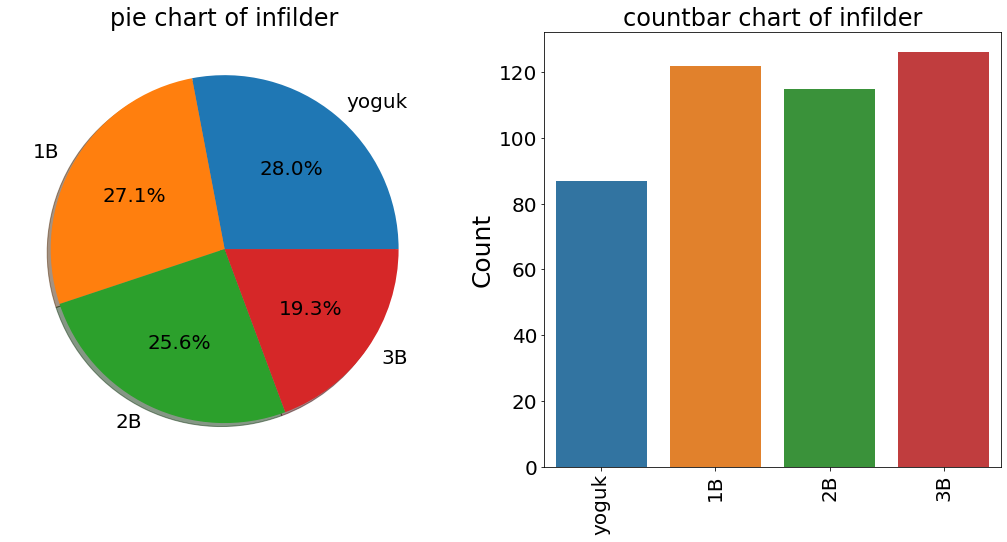

In [5]:
"""
(2. 데이터 시각화)
"""
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

# check if data is imbalanced

f, ax=plt.subplots(1, 2, figsize=(18,8))
kbo_df['POS'].value_counts().plot.pie(labels=['yoguk', '1B', '2B', '3B'],
                                      autopct='%1.1f%%',
                                      ax=ax[0],
                                      shadow=True)
ax[0].set_title('pie chart of infilder')
ax[0].set_ylabel('')
sns.countplot('POS',
              data=kbo_df,
              ax=ax[1])
ax[1].set_title('countbar chart of infilder',)
ax[1].set_ylabel('Count', fontsize=25)
ax[1].set_xlabel('')
ax[1].set_xticklabels(['yoguk', '1B', '2B', '3B'], rotation='vertical')
plt.show()

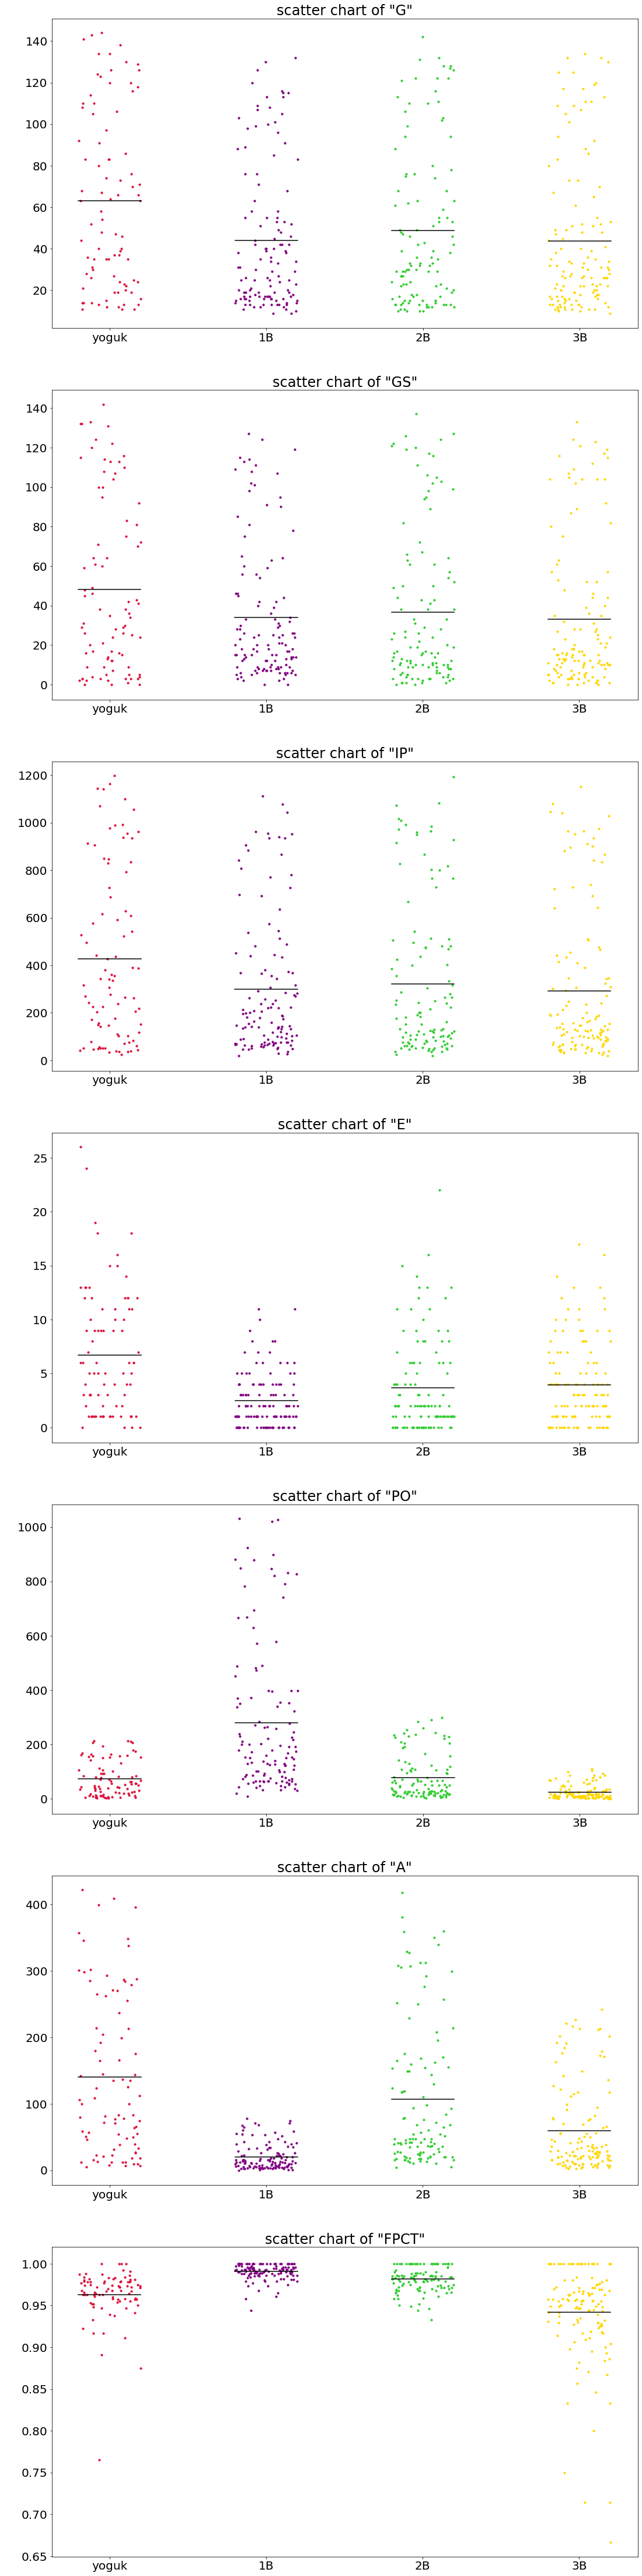

In [6]:
def scatter_features(df, feature_list):
    f, ax = plt.subplots(len(feature_list), 1, figsize=(18,80))
    f.subplots_adjust(hspace=0.2)
    width = 0.4
    colors = ["crimson", "purple", "limegreen", "gold"]

    for k, col_name in enumerate(feature_list):
        for i, value in enumerate(kbo_df.groupby('POS')):
            gid = value[0]
            data = value[1]

            x = np.ones(data.shape[0])*i + (np.random.rand(data.shape[0])*width-width/2.)
            ax[k].scatter(x, data[col_name], color=colors[i], s=10)
            mean = data[col_name].mean()
            ax[k].plot([i-width/2., i+width/2.],[mean,mean], color="k")
            ax[k].set_ylabel(' ')
            ax[k].set_xticks([0.0, 1.0, 2.0, 3.0])
            ax[k].set_xticklabels(['yoguk', '1B', '2B', '3B'])
            ax[k].set_title(f'scatter chart of "{col_name}"')
    plt.show()

scatter_features(kbo_df, ['G', 'GS', 'IP', 'E', 'PO', 'A', 'FPCT'])

In [7]:
preprocess(mlb_df)
mlb_df = mlb_df[feature_list]
mlb_df = mlb_df.astype('float')

print(f'{mlb_df.isnull().sum()}\n')
print(mlb_df.dtypes)

POS     0
G       0
GS      0
IP      0
E       0
PO      0
A       0
FPCT    0
dtype: int64

POS     float64
G       float64
GS      float64
IP      float64
E       float64
PO      float64
A       float64
FPCT    float64
dtype: object


In [8]:
mlb_df

,POS,G,GS,IP,E,PO,A,FPCT
0,1.0,159.0,155.0,1369.2,5.0,1256.0,111.0,0.996
1,1.0,110.0,104.0,894.2,3.0,728.0,73.0,0.996
2,1.0,146.0,144.0,1226.2,5.0,1140.0,123.0,0.996
3,1.0,158.0,157.0,1365.2,6.0,1296.0,63.0,0.996
4,1.0,144.0,123.0,1155.1,6.0,1017.0,99.0,0.995
...,...,...,...,...,...,...,...,...
67,0.0,152.0,151.0,1337.1,17.0,161.0,370.0,0.969
68,0.0,132.0,125.0,1082.2,15.0,138.0,304.0,0.967
69,0.0,142.0,141.0,1212.2,20.0,175.0,351.0,0.963
70,0.0,142.0,139.0,1233.0,22.0,141.0,343.0,0.957


In [9]:
kbo_y = kbo_df['POS'].values
kbo_y
kbo_df.drop(['POS'],axis=1, inplace=True)
kbo_X = kbo_df.values

In [10]:
kbo_X

array([[1.44000000e+02, 1.32000000e+02, 1.14366667e+03, ...,
        1.79000000e+02, 3.57000000e+02, 9.54000000e-01],
       [1.42000000e+02, 1.37000000e+02, 1.19266667e+03, ...,
        2.99000000e+02, 4.18000000e+02, 9.82000000e-01],
       [1.34000000e+02, 1.33000000e+02, 1.15300000e+03, ...,
        9.30000000e+01, 2.11000000e+02, 9.56000000e-01],
       ...,
       [1.10000000e+01, 5.00000000e+00, 4.63333333e+01, ...,
        2.00000000e+00, 9.00000000e+00, 8.46000000e-01],
       [1.10000000e+01, 0.00000000e+00, 3.96666667e+01, ...,
        6.00000000e+00, 1.20000000e+01, 9.47000000e-01],
       [1.10000000e+01, 4.00000000e+00, 3.90000000e+01, ...,
        5.00000000e+00, 4.00000000e+00, 9.00000000e-01]])

In [11]:
kbo_X

array([[1.44000000e+02, 1.32000000e+02, 1.14366667e+03, ...,
        1.79000000e+02, 3.57000000e+02, 9.54000000e-01],
       [1.42000000e+02, 1.37000000e+02, 1.19266667e+03, ...,
        2.99000000e+02, 4.18000000e+02, 9.82000000e-01],
       [1.34000000e+02, 1.33000000e+02, 1.15300000e+03, ...,
        9.30000000e+01, 2.11000000e+02, 9.56000000e-01],
       ...,
       [1.10000000e+01, 5.00000000e+00, 4.63333333e+01, ...,
        2.00000000e+00, 9.00000000e+00, 8.46000000e-01],
       [1.10000000e+01, 0.00000000e+00, 3.96666667e+01, ...,
        6.00000000e+00, 1.20000000e+01, 9.47000000e-01],
       [1.10000000e+01, 4.00000000e+00, 3.90000000e+01, ...,
        5.00000000e+00, 4.00000000e+00, 9.00000000e-01]])

In [12]:
from keras.utils import to_categorical
kbo_y = to_categorical(kbo_y)
kbo_y

Using TensorFlow backend.


array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [13]:
mlb_y = mlb_df['POS'].values
mlb_y
mlb_df.drop(['POS'],axis=1, inplace=True)
mlb_X = mlb_df.values

mlb_y = to_categorical(mlb_y)

In [14]:
"""
(3. feqture 분석)

Analyize feature importance with random forest

Random forests are one the most popular machine learning algorithms. They are so 
successful because they provide in general a good predictive performance, low 
overfitting, and easy interpretability. This interpretability is given by the fact 
that it is straightforward to derive the importance of each variable on the tree 
decision. In other words, it is easy to compute how much each variable is contributing 
to the decision.

To give a better intuition, features that are selected at the top of the trees are 
in general more important than features that are selected at the end nodes of 
the trees, as generally the top splits lead to bigger information gains.
https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators=500, n_jobs=-1))
sel.fit(kbo_X, kbo_y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=500, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
    

['G', 'GS', 'IP', 'E', 'PO', 'A', 'FPCT']
G 0.08580516339191945
GS 0.09306511522045692
IP 0.11407941935758321
E 0.052573618973526366
PO 0.2886593007802354
A 0.19968097996359158
FPCT 0.1661364023126871


<Figure size 432x288 with 0 Axes>

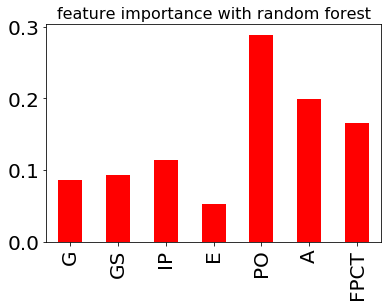

In [15]:
"""
사이킷런은 어떤 특성을 사용한 노드가 (랜덤 포레스트에 있는 모든 트레이 걸쳐서) 
평균적으로 불순도를 얼마나 감소시키는지 확인하여 특성의 중요도를 측정합니다. 
더 정확히 말하면 가중치 평균이며 각 노드의 가중치는 연관된 훈련 샘플수와 같습니다.
Aurelien Geron, Hands-On Machine Learning with Scikit-Learn and TensorFlow

"""
feature_list.remove('POS')
print(feature_list)

importances = sel.estimator_.feature_importances_

for name, score in zip(feature_list, importances):
    print(name, score)

dict = {'name':feature_list, 'importance': importances}
df = pd.DataFrame(dict)

plt.figure()
df.plot.bar(color='r')

plt.title("feature importance with random forest", fontsize=16)
plt.xticks(range(len(feature_list)), feature_list)
plt.legend().set_visible(False)
plt.show()

In [16]:
selected_feat= kbo_df.columns[(sel.get_support())]
print(selected_feat.values)
len(selected_feat)

for i, selected in enumerate(sel.get_support()):
    print(f'{feature_list[i]}: {selected}')

['PO' 'A' 'FPCT']
G: False
GS: False
IP: False
E: False
PO: True
A: True
FPCT: True


In [17]:
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(kbo_X, kbo_y)
y_hat = rnd_clf.predict(mlb_X)
print(f"no selected feature's accuracy with random forest: {accuracy_score(mlb_y, y_hat)}")

# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sel.transform(kbo_X)
X_important_test = sel.transform(mlb_X)

_rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
_rnd_clf.fit(X_important_train, kbo_y)
_y_hat = _rnd_clf.predict(X_important_test)
print(f"selected feature's accuracy with random forest: {accuracy_score(mlb_y, _y_hat)}")

no selected feature's accuracy with random forest: 0.7361111111111112
selected feature's accuracy with random forest: 0.7638888888888888


In [18]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_important_train)

scaled_rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
scaled_rnd_clf.fit(scaler.transform(X_important_train), kbo_y)
scaled_y_hat = scaled_rnd_clf.predict(scaler.transform(X_important_test))
print(f"normalized data's accuracy with random forest: {accuracy_score(mlb_y, scaled_y_hat)}")

normalized data's accuracy with random forest: 0.7638888888888888


In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import backend as K

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=3))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20)
hist = model.fit(scaler.transform(X_important_train), 
                 kbo_y,
                 epochs=300,
                 verbose=0,
                 validation_split=0.1,
                 callbacks=[early_stopping],
                 batch_size=32)
score = model.evaluate(scaler.transform(X_important_test), mlb_y, batch_size=32)
print(f'loss: {score[0]}, accuracy: {score[1]}')

72/72 [==============================] - 0s 97us/step
loss: 0.3228379487991333, accuracy: 0.9166666865348816


In [55]:
dense_y_hat = model.predict_classes(scaler.transform(X_important_test))
print(f"dense net's accuracy: {accuracy_score(mlb_y, to_categorical(dense_y_hat))}")

dense net's accuracy: 0.9166666666666666


In [52]:
# # network layer is 11

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=3))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20)
hist = model.fit(scaler.transform(X_important_train), 
                 kbo_y,
                 epochs=300,
                 verbose=0,
                 validation_split=0.1,
                 callbacks=[early_stopping],
                 batch_size=32)
score = model.evaluate(scaler.transform(X_important_test), mlb_y, batch_size=32)
print(f'loss: {score[0]}, accuracy: {score[1]}')

72/72 [==============================] - 0s 83us/step
loss: 1.2249101797739665, accuracy: 0.3333333432674408
